In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("/Users/verapinto/Desktop/LABS/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [50]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [155]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

## Part 1: Understanding Product Categories

In [52]:
# 1. Which are the top 5 most listed product categories?

frequency_table = df['category'].value_counts().sort_values(ascending=False)
top_5 = df['category'].value_counts().head(5)

print("Frequency table for product category:\n",frequency_table) 
print("Top 5 most listed product categories:\n",top_5)

Frequency table for product category:
 category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64
Top 5 most listed product categories:
 category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


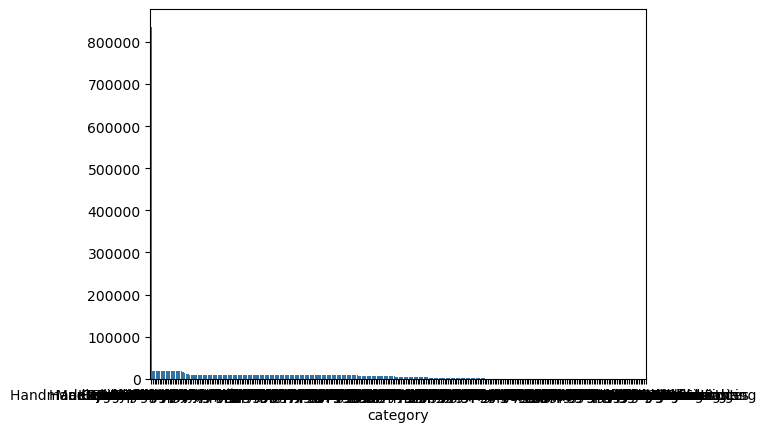

In [56]:
# 2. Display the distribution of products across different categories using a bar chart. 
# If you face problems understanding the chart, do it for a subset of top categories.
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

sns.barplot(x=frequency_table.index, y=frequency_table.values)

# Display the plot
plt.show()



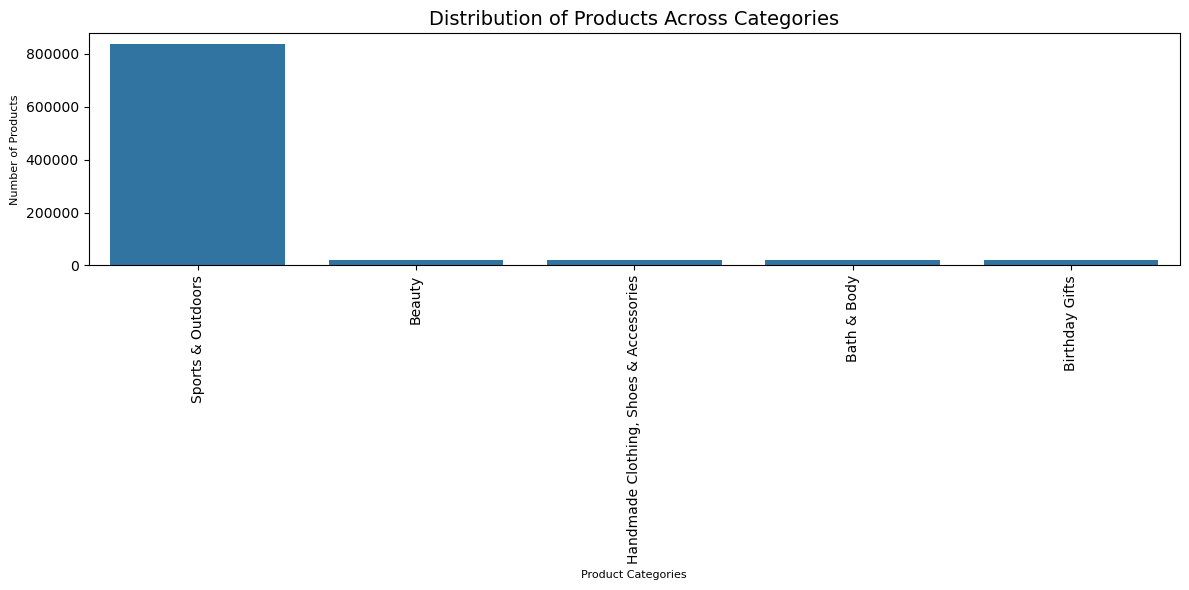

In [93]:
plt.figure(figsize=(12, 6))

top_categories = frequency_table.head(5)
sns.barplot(x=top_categories.index, y=top_categories.values)

#Adding labels and a title
plt.xlabel('Product Categories', fontsize=8)
plt.ylabel('Number of Products', fontsize=8)
plt.title('Distribution of Products Across Categories', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

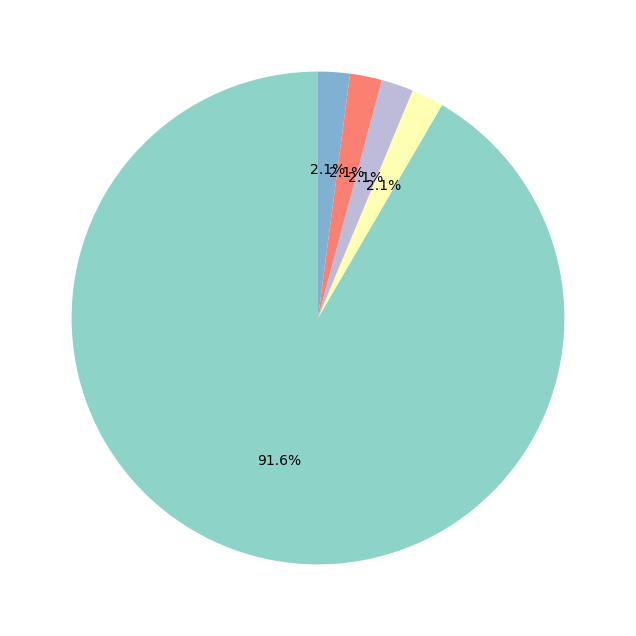

In [95]:
plt.figure(figsize=(8, 8))
plt.pie(top_categories.values, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

In [ ]:
# Business Question: 
# What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

# The top 5 most listed product categories show a significant dominance of "Sports & Outdoors," with a frequency of 836,265 listing dynamics. 
# This category far surpasses the others, such as "Beauty" (19,312) and "Handmade Clothing, Shoes & Accessories" (19,229). 
# The remaining categories, "Bath & Body" (19,092) and "Birthday Gifts" (18,978), are relatively close in listing frequency.

## Part 2: Delving into Product Pricing

In [106]:
# Measures of Centrality:
# 1. Calculate the mean, median, and mode for the price of products.
# What's the average price point of products listed? How does this compare with the most common price point (mode)?

mean_price = df['price'].mean() # average
median_price = df['price'].median() #price in the middle of the list
mode_price = df['price'].mode()[0] #most common value
mean_price, median_price, mode_price

#The average price point (mean) of products listed is 89.24, which is significantly higher than the mode price (9.99).
#This suggests that while most products are priced around the mode (9.99), there are higher-priced items pulling the average upward.

(89.24380943923663, 19.09, 9.99)

In [167]:
#Measures of Dispersion:

#2. Determine the variance, standard deviation, range, and interquartile range for product price.
# How varied are the product prices? Are there any indicators of a significant spread in prices?

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print("variance product price:",variance_price)
print("standard deviation product price:",std_dev_price)
print("range product price:",range_price)
print("interquartile range product price:\n",quantiles_price)

#The high standard deviation and range point to a dataset with extreme outliers, likely luxury or special products priced much higher than the majority.
#The interquartile range highlights that the central 50% of the data lies between 9.99 and 45.99, showing that the bulk of products are priced relatively low. 
#However, the presence of extremely high-priced items stretches the total range, contributing to the high variance and standard deviation.

variance product price: 119445.4853225653
standard deviation product price: 345.6088617535223
range product price: 100000.0
interquartile range product price:
 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


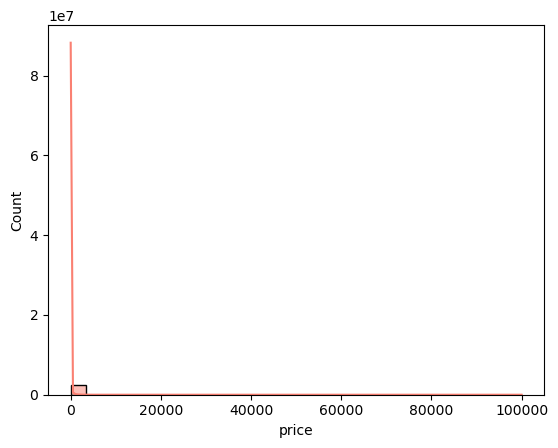

In [169]:
#Visualizations:

#3. Is there a specific price range where most products fall? 
#Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

sns.histplot(df['price'], kde=True, bins=30, color="salmon")
plt.show()

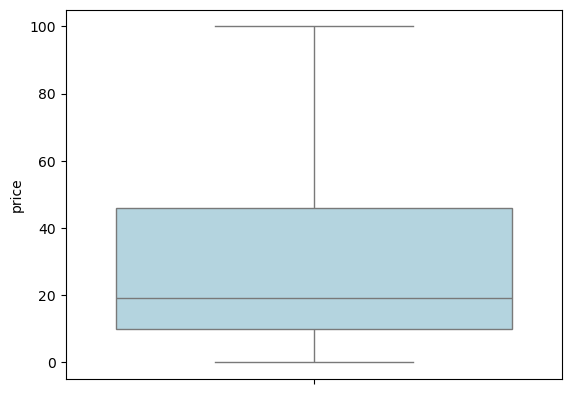

In [170]:
# Plotting a boxplot for the 'price' column with a light blue color
sns.boxplot(data = df['price'], color="lightblue", showfliers=False)  # Exclude outliers
plt.show()

#The interquartile range shows that 50% of the data falls between 9.99 and 45.99, while the mean and variance suggest the presence of products priced significantly higher than the rest.
#To have a proper visualization, the oultiers need to be excluded.

In [171]:
# Discretizing 'price' into 4 categories
bins = [0, 1000, 2000, 3000, df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
df.price_category.value_counts()

price_category
Low          2404537
Medium         26447
High            6403
Very High       6264
Name: count, dtype: int64

In [173]:
#Business Question: 
#How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#The majority of products are priced affordably, catering to a broad customer base.
#However, the presence of high-priced items reflects Amazon's diverse marketplace, which includes both budget-friendly and premium offerings.
#The significant spread in prices highlights the importance of analyzing specific categories or ranges to gain actionable insights.

## Part 3: Unpacking Product Ratings

In [136]:
#Measures of Centrality:

#1. Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?

mean_price = df['stars'].mean() # average
median_price = df['stars'].median() #price in the middle of the list
mode_price = df['stars'].mode()[0] #most common value
mean_price, median_price, mode_price

# There doesn’t appear to be a meaningful trend from the provided statistics, as the data is heavily 0.0. 
#To better understand customer ratings, it would be helpful to filter out products with 0.0 ratings.

(2.152836472966065, 0.0, 0.0)

In [165]:
# Exclude rows where 'stars' is equal to 0
filtered_df = df[df['stars'] != 0]

# Recalculate metrics
mean_rating = filtered_df['stars'].mean()
median_rating = filtered_df['stars'].median()
mode_rating = filtered_df['stars'].mode()[0]

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")

#Excluding rating equl to 0:The average rating is relatively high, showing that customers tend to rate products above 4 stars.
#The middle rating reflects consistency, indicating that at least half of the products are rated at or above 4.4 stars.
#The most common rating suggests that many products are consistently viewed favorably by customers.
#These statistics indicate strong overall satisfaction among customers.

Mean Rating: 4.31916076222691
Median Rating: 4.4
Mode Rating: 4.5


In [183]:
#Measures of Dispersion:
#2.Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?

variance_stars = filtered_df['stars'].var()
std_dev_stars = filtered_df['stars'].std()
min_stars = filtered_df['stars'].min()
max_stars = filtered_df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = filtered_df['stars'].quantile([0.25, 0.5, 0.75])

print("variance product rating:",variance_stars)
print("standard deviation product rating:",std_dev_stars)
print("range product rating:",range_stars)
print("interquartile range product rating:\n",quantiles_stars)

#Customer ratings are highly consistent, with most products being rated positively. 
#The small variation in ratings reflects uniform satisfaction and quality, with only a few products potentially receiving lower ratings.

variance product rating: 0.30834337523805183
standard deviation product rating: 0.5552867504614637
range product rating: 4.0
interquartile range product rating:
 0.25    4.1
0.50    4.4
0.75    4.6
Name: stars, dtype: float64


In [188]:
#Shape of the Distribution:

#3. Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?

skewness_rating = filtered_df['stars'].skew()
kurtosis_rating = filtered_df['stars'].kurtosis()

skewness_price, kurtosis_price

#The ratings are not normally distributed.
#A negative skewness indicates that the ratings distribution is left-skewed, meaning the majority of ratings are concentrated on the higher values (closer to 4.5 stars).
#A kurtosis value significantly greater than 3 suggests that the distribution is leptokurtic, meaning it has a sharp peak and heavy tails.

(-2.3795681122127945, 9.78193769066435)

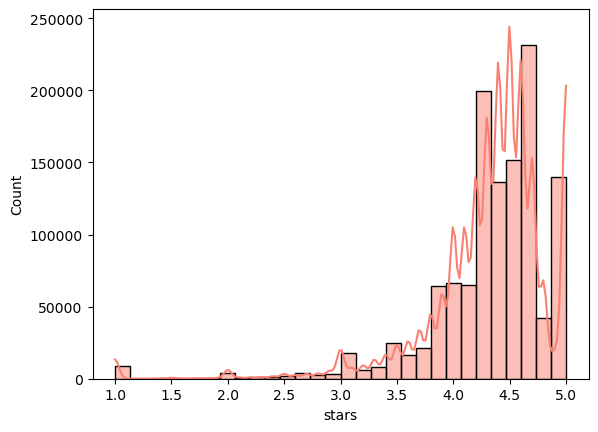

In [192]:
#Visualizations:

#4. Plot a histogram to visualize the distribution of product ratings. 
#Is there a specific rating that is more common?

sns.histplot(filtered_df['stars'], kde=True, bins=30, color="salmon")
plt.show()

In [ ]:
#Business Question: 
#How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?
#Customers on Amazon UK tend to rate products highly, with ratings showing strong consistency (low variance of 0.308 and standard deviation 0.555) and clustering around favorable values. 
#The skewed and leptokurtic distribution highlights a tendency toward positive feedback, likely driven by product quality and customer satisfaction.
